## PyTorch Tutorial!!!
In this assignment, you will be familiarized with the usage of the PyTorch library and how to build a model in two ways  
It's quite similar to TensorFlow
*   using the inbuilt layers in pytorch
*   using custom layers to replicate the same result

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Using the GPU if it exists
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Loading and preprocessing the Data
We will directly be using the dataset included in literally any library that exists. MNIST really is THAT popular.  
Link: https://docs.pytorch.org/vision/0.9/datasets.html#mnist

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

## Making a simple feedforward network

The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [4]:
# Build the model
SequentialNet = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

### Training and Testing loops

In [5]:
# Training loop
def train(model, loader, optimizer, loss_fn, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            logits = model(x)
            loss = loss_fn(logits, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Testing loop
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    print(f"Accuracy: {100 * correct / total:.2f}%")


### Training the sequential model

In [6]:
print("\nTraining SequentialNet")
sequential_model = SequentialNet.to(device)
optimizer_seq = optim.Adam(sequential_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


train(sequential_model, train_loader, optimizer_seq, loss_fn)
test(sequential_model, test_loader)


Training SequentialNet
Epoch 1, Loss: 376.3619
Epoch 2, Loss: 181.3185
Epoch 3, Loss: 128.6057
Epoch 4, Loss: 104.4831
Epoch 5, Loss: 88.7335
Accuracy: 96.58%


### Manually building the same network from scratch
You can use the simple sequential model we described above as a reference.

In [7]:
# Custom model
class ManualNet(nn.Module):
    def __init__(self):
        super(ManualNet, self).__init__()
        # TODO: Define your paramters using nn.Parameters (the layers)
        self.weights1 = nn.Parameter(torch.randn(size=(784, 128)))
        self.biases1 = nn.Parameter(torch.zeros(size=(128,)))
        self.weights2 = nn.Parameter(torch.randn(size=(128, 64)))
        self.biases2 = nn.Parameter(torch.zeros(size=(64,)))
        self.weights3 = nn.Parameter(torch.randn(size=(64, 10)))
        self.biases3 = nn.Parameter(torch.zeros(size=(10,)))

    def forward(self, x):
        x = x.view(-1, 784)
        # TODO: Do the forward pass using matrix multiplications and applying activation functions
        outs1 = nn.ReLU()(x @ self.weights1 + self.biases1)
        outs2 = nn.ReLU()(outs1 @ self.weights2 + self.biases2)
        logits = outs2 @ self.weights3 + self. biases3
        return logits

### Training the manual model

In [8]:
print("\nTraining ManualNet")
# TODO: Create a ManualNet object and call it manual_model. Train and test it

manual_model = ManualNet()
manual_model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer_man = optim.Adam(manual_model.parameters(), lr=0.007)

train(manual_model, train_loader, optimizer_man, loss_fn, epochs=20)
print("\nTesting ManualNet")
test(manual_model, test_loader)



Training ManualNet
Epoch 1, Loss: 20075.6697
Epoch 2, Loss: 1702.5332
Epoch 3, Loss: 1549.5128
Epoch 4, Loss: 1352.0514
Epoch 5, Loss: 1062.5347
Epoch 6, Loss: 791.5129
Epoch 7, Loss: 623.6038
Epoch 8, Loss: 456.0811
Epoch 9, Loss: 394.8917
Epoch 10, Loss: 340.3167
Epoch 11, Loss: 324.2909
Epoch 12, Loss: 275.3422
Epoch 13, Loss: 267.3717
Epoch 14, Loss: 241.9764
Epoch 15, Loss: 236.2244
Epoch 16, Loss: 213.2589
Epoch 17, Loss: 202.7333
Epoch 18, Loss: 198.9942
Epoch 19, Loss: 182.3959
Epoch 20, Loss: 176.6558

Testing ManualNet
Accuracy: 94.28%


### Visualize the outputs of the models

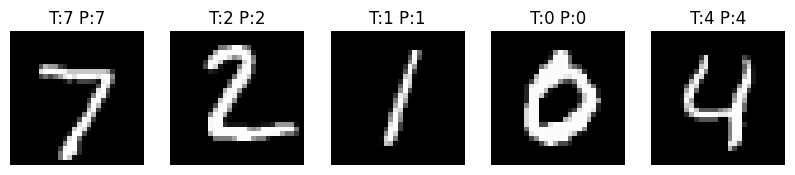

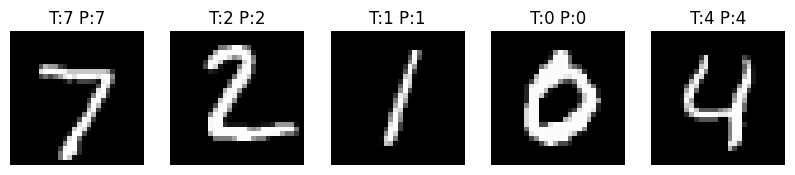

In [9]:
def visualize(model, loader, n=5):
    model.eval()
    x, y = next(iter(loader))
    x, y = x.to(device), y.to(device)
    preds = model(x).argmax(dim=1)

    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(x[i].cpu().squeeze(), cmap='gray')
        plt.title(f"T:{y[i].item()} P:{preds[i].item()}")
        plt.axis('off')
    plt.show()

visualize(manual_model, test_loader)
visualize(sequential_model, test_loader)

## Assignment
* Load and preprocess CIFAR100 dataset (not CIFAR10)
* Build a feedforward network for it. You can experiment around with number of layers and and neurons in each layer and different activation functions
* You are allowed to use nn.functional. (convolutions _might_ make your accuracy better)

# Bonus Assignment
* Try the solving the "Titanic Survival Prediction" dataset from kaggle